In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn

In [93]:
df = pd.read_csv('CustomerPurchase.csv')

In [94]:
df

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No
5,1026,31,Female,School,Average,Yes
6,1027,18,Male,School,Good,No
7,1028,60,Female,School,Poor,Yes
8,1029,65,Female,UG,Average,No
9,1030,74,Male,UG,Good,Yes


In [95]:
df.isna().sum()

Customer ID    0
Age            0
Gender         0
Education      0
Review         0
Purchased      0
dtype: int64

In [96]:
df = df.drop('Customer ID', axis = 1)

In [97]:
counts = df['Gender'].value_counts()
colors = ['#FF69B4', '#89CFF0']

Text(0.5, 1.0, 'Gender in DataSet')

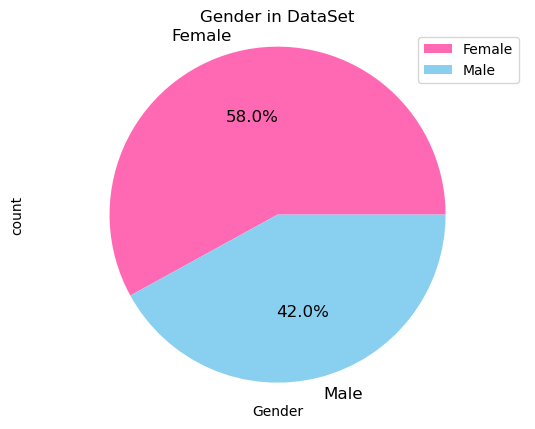

In [98]:
counts.plot(kind = 'pie', fontsize = 12, colors = colors, autopct = '%1.1f%%')
plt.xlabel('Gender')
plt.axis('equal')
plt.legend(labels = counts.index, loc = 'best')
plt.title('Gender in DataSet')

Text(0.5, 1.0, 'Count of Purchases in DataSet')

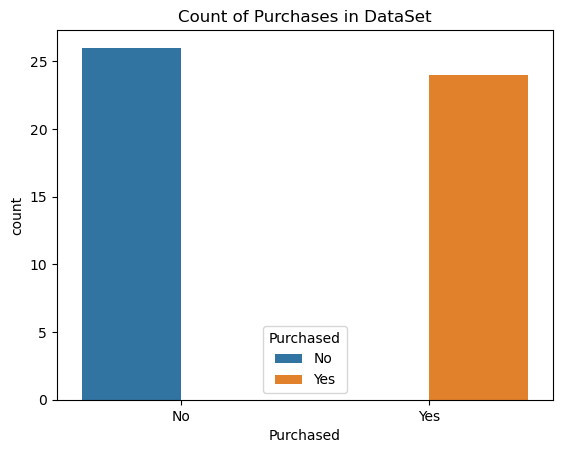

In [99]:
sns.countplot(x='Purchased', hue = 'Purchased', data = df)
plt.title("Count of Purchases in DataSet")

Text(0.5, 1.0, 'Count of Review')

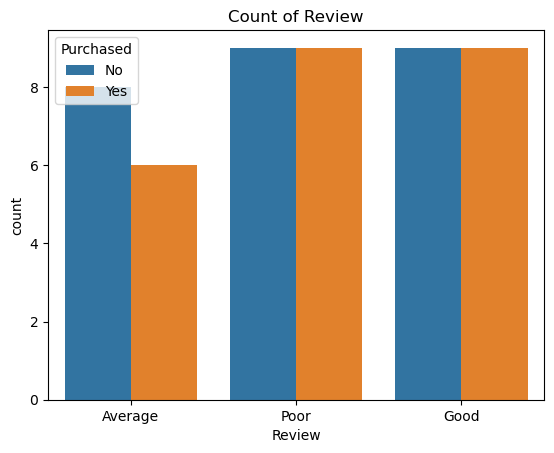

In [180]:
sns.countplot(x='Review', hue = 'Purchased', data = df)
plt.title("Count of Review")

<Axes: xlabel='Age', ylabel='count'>

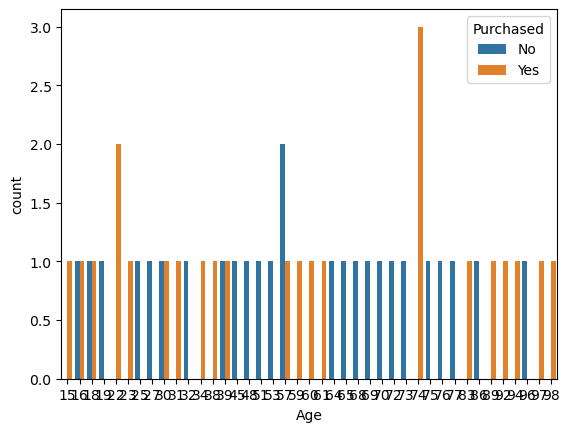

In [100]:
sns.countplot(x='Age', hue = 'Purchased', data = df)

Text(0.5, 0, 'Age')

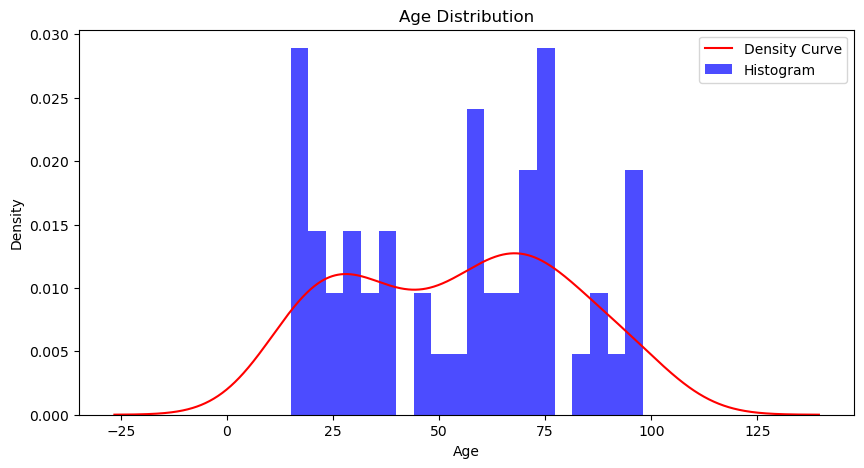

In [101]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(df['Age'], bins = 20, alpha = 0.7, color = 'blue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)
ax.set_title("Age Distribution")
ax.legend(['Density Curve', 'Histogram'])
ax.set_xlabel('Age')

<Axes: xlabel='Review', ylabel='count'>

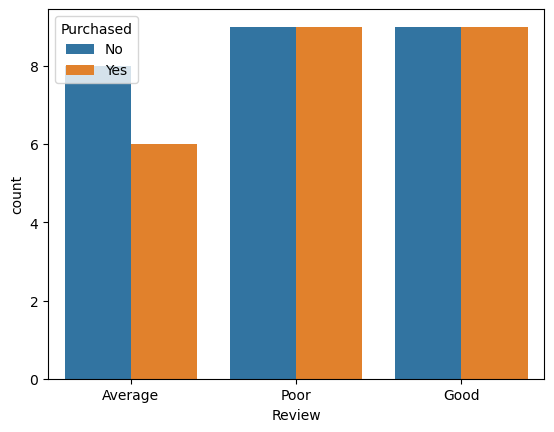

In [102]:
sns.countplot(x='Review', hue = 'Purchased', data = df)

Text(0.5, 1.0, 'Count of Education')

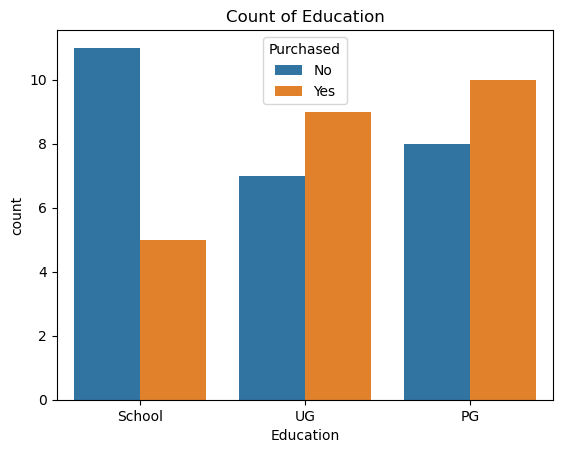

In [181]:
sns.countplot(x='Education', hue = 'Purchased', data = df)
plt.title("Count of Education")

In [104]:
df.head()

,Age,Gender,Education,Review,Purchased
0,30,Female,School,Average,No
1,68,Female,UG,Poor,No
2,70,Female,PG,Good,No
3,72,Female,PG,Good,No
4,16,Female,UG,Average,No


In [146]:
#Set target column
Y = df['Purchased']
X = df.drop(['Purchased'], axis = 1)

In [147]:
X.shape, Y.shape

((50, 4), (50,))

In [164]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [165]:
X.replace({'Review':{'Poor':0, 'Average':1, 'Good':3}}, inplace = True)
X.replace({'Gender':{'Female':1, 'Male':0}}, inplace = True)
X.replace({'Education':{'School':0, 'UG':1, 'PG':2}}, inplace = True)

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 200)

In [167]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((35, 4), (15, 4), (35,), (15,))

In [168]:
clt = RandomForestClassifier()

In [169]:
clt.fit(X_train, Y_train)

RandomForestClassifier()

In [170]:
from sklearn.metrics import accuracy_score, classification_report

In [171]:
y_pred = clt.predict(X_test)

In [172]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.70      0.78      0.74         9
         Yes       0.60      0.50      0.55         6

    accuracy                           0.67        15
   macro avg       0.65      0.64      0.64        15
weighted avg       0.66      0.67      0.66        15



In [175]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

[Text(0.4230769230769231, 0.9375, 'Education <= 0.5\ngini = 0.5\nsamples = 35\nvalue = [17, 18]'),
 Text(0.23076923076923078, 0.8125, 'Review <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.15384615384615385, 0.6875, 'Age <= 55.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07692307692307693, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3076923076923077, 0.6875, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6153846153846154, 0.8125, 'Review <= 2.0\ngini = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(0.46153846153846156, 0.6875, 'Age <= 79.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.38461538461538464, 0.5625, 'Age <= 64.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.3076923076923077, 0.4375, 'Age <= 56.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.23076923076923078, 0.3125, 'Age <= 22.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Tex

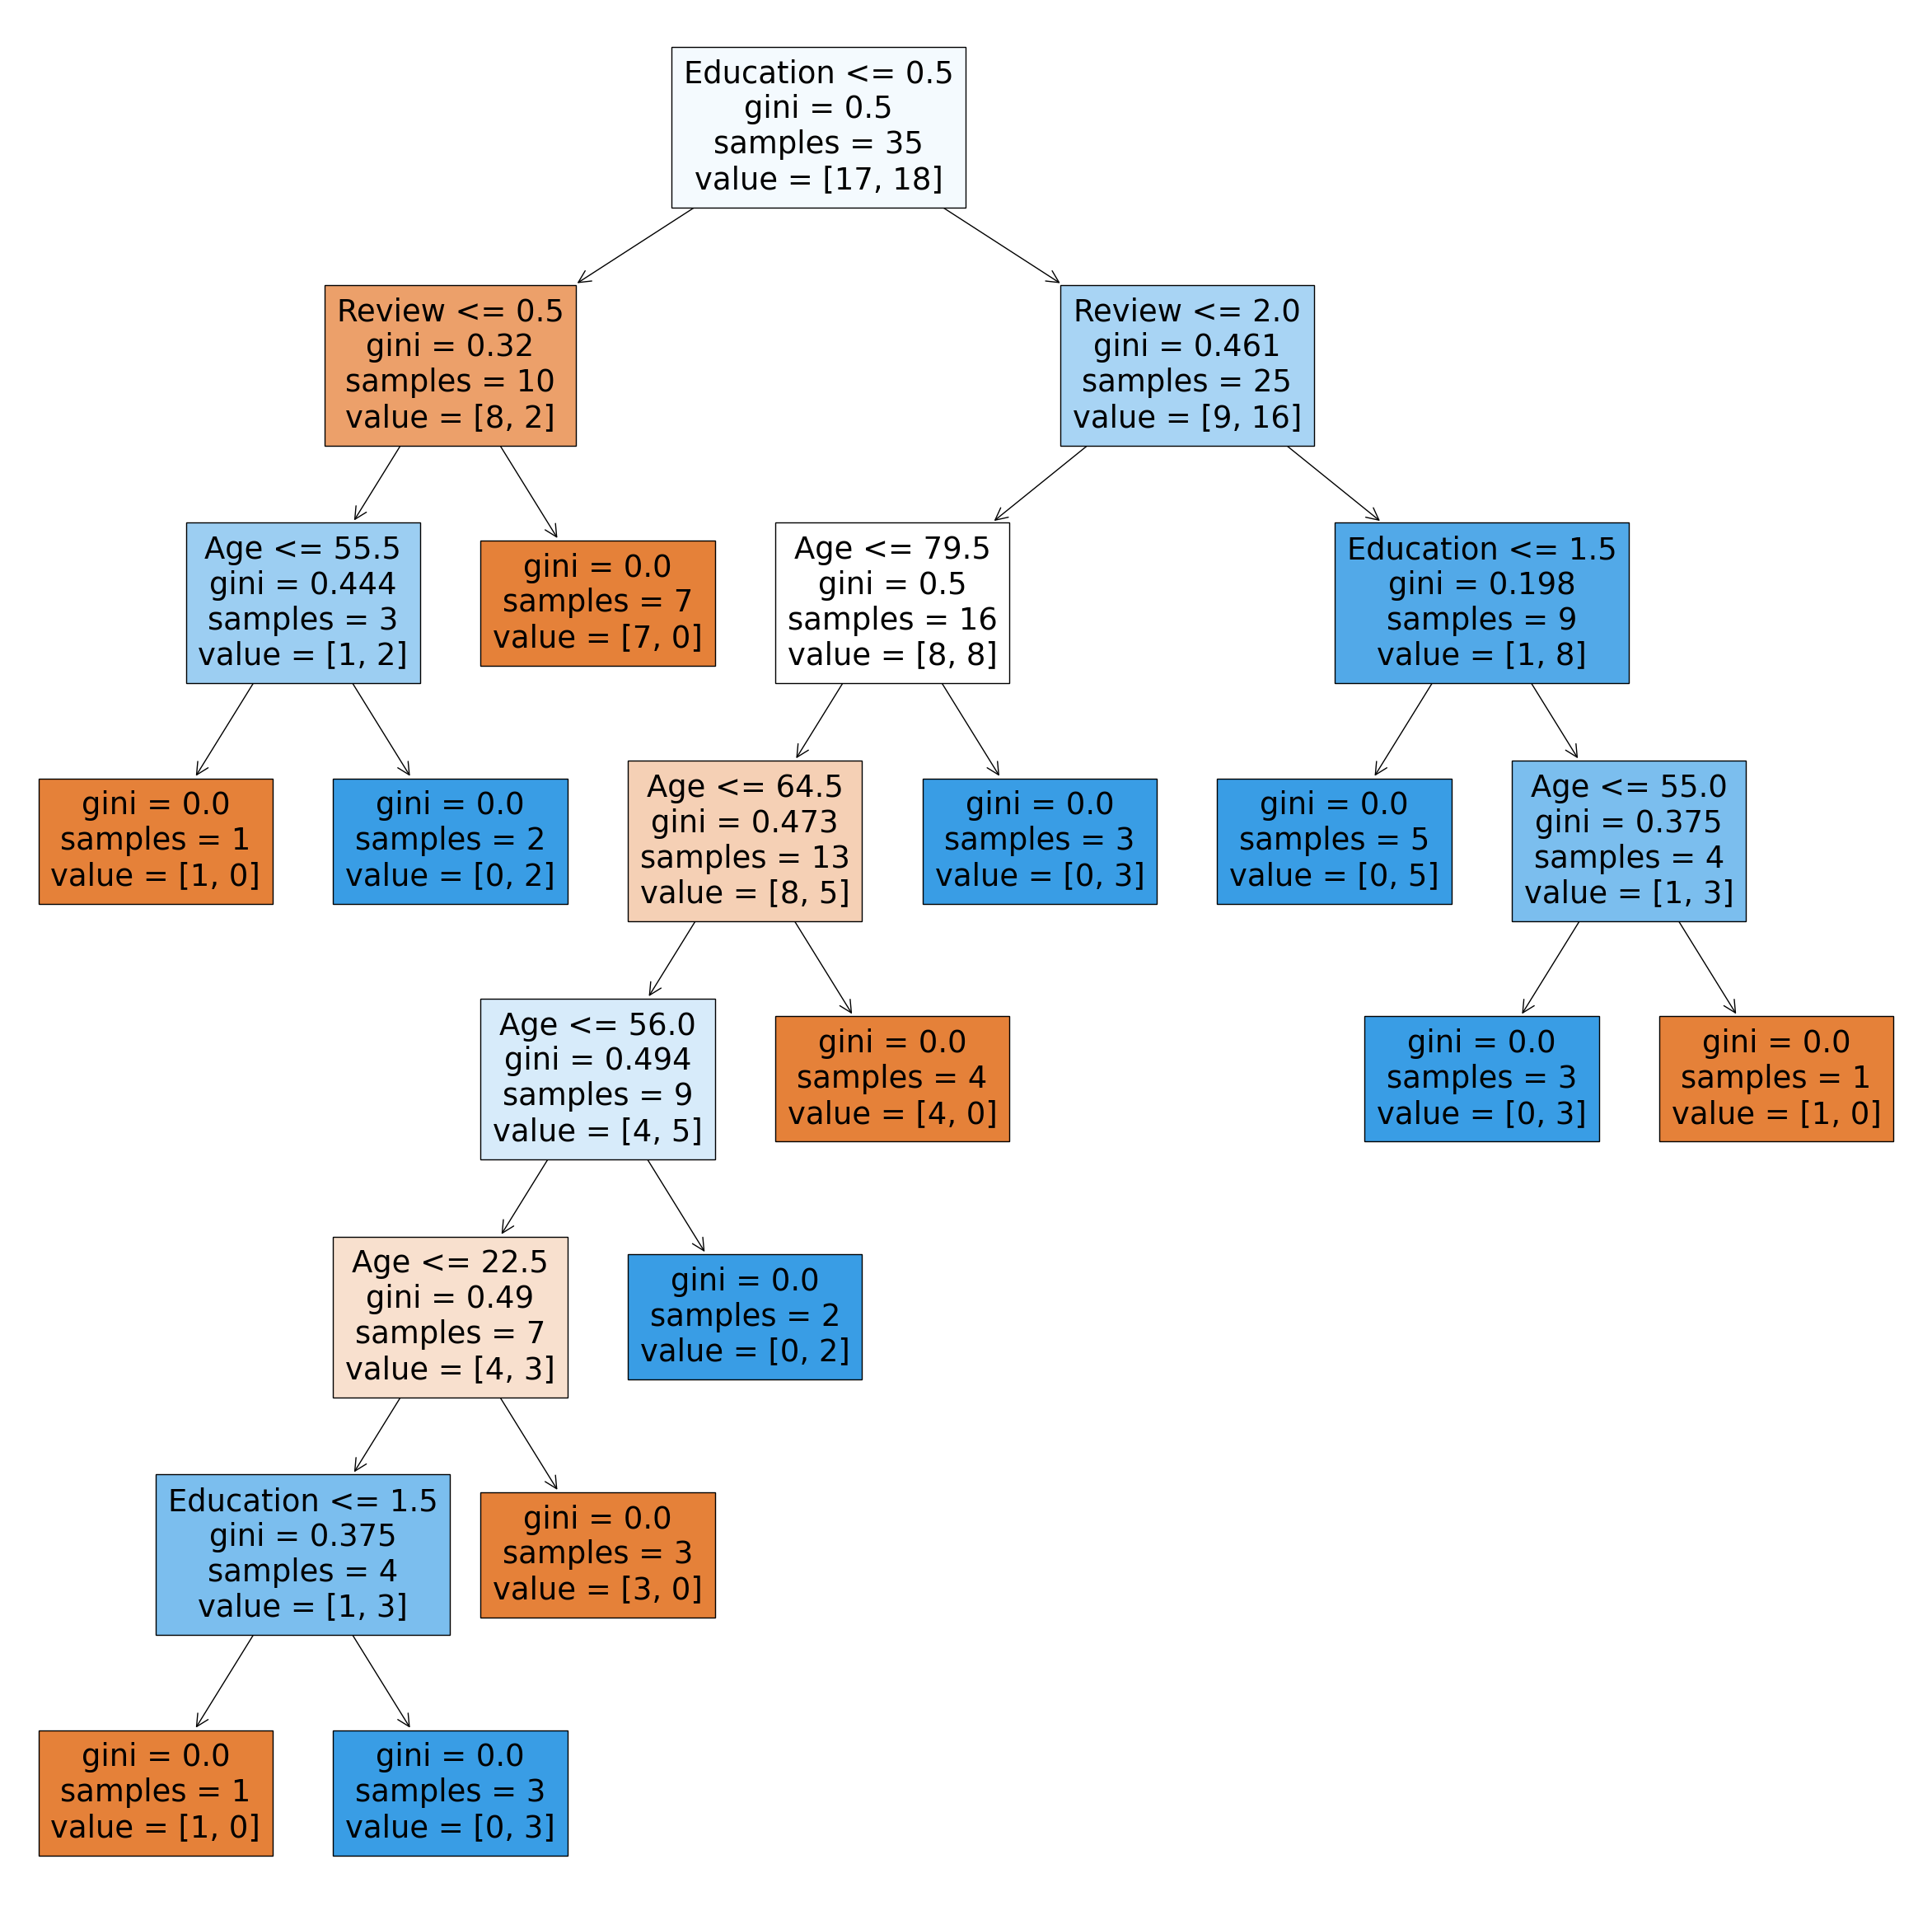

In [178]:
fig = plt.figure(figsize = (30,30))
tree.plot_tree(classifier, feature_names = X.columns.to_list(), filled = True)